# Network metrics and percolation

# Study Guide
Working through the readings from ```Chapter 17 of Sayama, H. (2015). Introduction to the modeling and analysis of complex systems. Open SUNY Textbooks, Milne Library. Genesco, NY.```

In [38]:
import networkx as nx
from pylab import *
from matplotlib import rc

rc('font',**{'family':'serif','serif':['Computer Modern'],'size': 18})
rc('text', usetex=True)

[16, 5, 0, 31, 25]


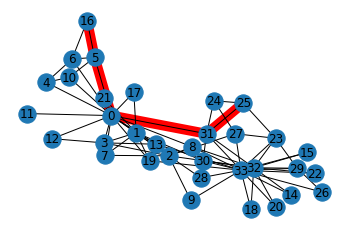

In [6]:
g = nx.karate_club_graph()
positions = nx.spring_layout(g)

path = nx.shortest_path(g, 16, 25)
edges = [(path[i], path[i+1]) for i in range(len(path) - 1)]

nx.draw_networkx_edges(g, positions, edgelist = edges,
                       edge_color = 'r', width = 10)
nx.draw(g, positions, with_labels = True)
print(path)
show()

In [7]:
"""
This formula works for both undirected and
directed networks. It calculates the average length of shortest paths for all
possible node pairs in the network, giving an expected distance between two
randomly chosen nodes. This is an intuitive characterization of how big (or
small) the world represented by the network is
"""
g = nx.karate_club_graph()
nx.average_shortest_path_length(g)

2.408199643493761

In [9]:
"""
This metric is defined for each node and gives the maximal shortest path length
a node can have with any other node in the network. This tells how far the node
is to the farthest point in the network.
"""
print(nx.eccentricity(g))

{0: 3, 1: 3, 2: 3, 3: 3, 4: 4, 5: 4, 6: 4, 7: 4, 8: 3, 9: 4, 10: 4, 11: 4, 12: 4, 13: 3, 14: 5, 15: 5, 16: 5, 17: 4, 18: 5, 19: 3, 20: 5, 21: 4, 22: 5, 23: 5, 24: 4, 25: 4, 26: 5, 27: 4, 28: 4, 29: 5, 30: 4, 31: 3, 32: 4, 33: 4}


In [10]:
"""
This metric gives the maximal eccentricity in the network. Intuitively, it tells us
how far any two nodes can get from one another within the network. Nodes
whose eccentricity is D are called peripheries.
"""
nx.diameter(g)

5

In [11]:
"""
This metric gives the minimal eccentricity in the network. Intuitively, it tells us the
smallest number of steps you will need to reach every node if you can choose
an optimal node as a starting point.
"""
nx.radius(g)

3

In [12]:
"""
Nodes whose eccentricity is R are called centers.
"""
nx.center(g)

[0, 1, 2, 3, 8, 13, 19, 31]

In [14]:
"""
Degree centrality is simply a normalized node degree, i.e., the actual degree
divided by the maximal degree possible (n − 1). For directed networks, you can
define in-degree centrality and out-degree centrality separately.
"""
print(nx.degree_centrality(g))

{0: 0.48484848484848486, 1: 0.2727272727272727, 2: 0.30303030303030304, 3: 0.18181818181818182, 4: 0.09090909090909091, 5: 0.12121212121212122, 6: 0.12121212121212122, 7: 0.12121212121212122, 8: 0.15151515151515152, 9: 0.06060606060606061, 10: 0.09090909090909091, 11: 0.030303030303030304, 12: 0.06060606060606061, 13: 0.15151515151515152, 14: 0.06060606060606061, 15: 0.06060606060606061, 16: 0.06060606060606061, 17: 0.06060606060606061, 18: 0.06060606060606061, 19: 0.09090909090909091, 20: 0.06060606060606061, 21: 0.06060606060606061, 22: 0.06060606060606061, 23: 0.15151515151515152, 24: 0.09090909090909091, 25: 0.09090909090909091, 26: 0.06060606060606061, 27: 0.12121212121212122, 28: 0.09090909090909091, 29: 0.12121212121212122, 30: 0.12121212121212122, 31: 0.18181818181818182, 32: 0.36363636363636365, 33: 0.5151515151515151}


In [16]:
"""
Betweenness centrality of a node is the probability for the
shortest path between two randomly chosen nodes to go through that node.
This metric can also be defined for edges in a similar way, which is called edge
betweenness
"""
print(nx.betweenness_centrality(g))

{0: 0.43763528138528146, 1: 0.053936688311688304, 2: 0.14365680615680618, 3: 0.011909271284271283, 4: 0.0006313131313131313, 5: 0.02998737373737374, 6: 0.029987373737373736, 7: 0.0, 8: 0.05592682780182781, 9: 0.0008477633477633478, 10: 0.0006313131313131313, 11: 0.0, 12: 0.0, 13: 0.04586339586339586, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.03247504810004811, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.017613636363636363, 24: 0.0022095959595959595, 25: 0.0038404882154882154, 26: 0.0, 27: 0.02233345358345358, 28: 0.0017947330447330447, 29: 0.0029220779220779218, 30: 0.014411976911976909, 31: 0.13827561327561325, 32: 0.145247113997114, 33: 0.30407497594997596}


In [20]:
"""
This is an inverse of the average distance from node i to all other nodes. If
CC(i) = 1, that means you can reach any other node from node i in just one
step. For directed networks, you can also define another closeness centrality
by swapping i and j in the formula above to measure how accessible node i is
from other nodes.
"""
print(nx.closeness_centrality(g))

{0: 0.5689655172413793, 1: 0.4852941176470588, 2: 0.559322033898305, 3: 0.4647887323943662, 4: 0.3793103448275862, 5: 0.38372093023255816, 6: 0.38372093023255816, 7: 0.44, 8: 0.515625, 9: 0.4342105263157895, 10: 0.3793103448275862, 11: 0.36666666666666664, 12: 0.3707865168539326, 13: 0.515625, 14: 0.3707865168539326, 15: 0.3707865168539326, 16: 0.28448275862068967, 17: 0.375, 18: 0.3707865168539326, 19: 0.5, 20: 0.3707865168539326, 21: 0.375, 22: 0.3707865168539326, 23: 0.39285714285714285, 24: 0.375, 25: 0.375, 26: 0.3626373626373626, 27: 0.4583333333333333, 28: 0.4520547945205479, 29: 0.38372093023255816, 30: 0.4583333333333333, 31: 0.5409836065573771, 32: 0.515625, 33: 0.55}


In [21]:
"""
Eigenvector centrality measures the “importance” of each node by considering 
each incoming edge to the node an “endorsement” from its neighbor. This
differs from degree centrality because, in the calculation of eigenvector centrality, 
endorsements coming from more important nodes count as more. 
Another completely different, but mathematically equivalent, interpretation 
of eigenvector centrality is that it counts the number of walks from any node in the network
that reach node i in t steps, with t taken to infinity. Eigenvector v is usually
chosen to be a non-negative unit vector (v_i ≥ 0, |v| = 1).
"""
print(nx.eigenvector_centrality(g))

{0: 0.3554834941851943, 1: 0.2659538704545025, 2: 0.31718938996844476, 3: 0.2111740783205706, 4: 0.07596645881657382, 5: 0.07948057788594247, 6: 0.07948057788594247, 7: 0.17095511498035434, 8: 0.2274050914716605, 9: 0.10267519030637758, 10: 0.07596645881657381, 11: 0.05285416945233648, 12: 0.08425192086558088, 13: 0.22646969838808148, 14: 0.10140627846270832, 15: 0.10140627846270832, 16: 0.023634794260596875, 17: 0.09239675666845953, 18: 0.10140627846270832, 19: 0.14791134007618667, 20: 0.10140627846270832, 21: 0.09239675666845953, 22: 0.10140627846270832, 23: 0.15012328691726787, 24: 0.05705373563802805, 25: 0.05920820250279008, 26: 0.07558192219009324, 27: 0.13347932684333308, 28: 0.13107925627221215, 29: 0.13496528673866567, 30: 0.17476027834493085, 31: 0.19103626979791702, 32: 0.3086510477336959, 33: 0.373371213013235}


In [22]:
"""
PageRank is a variation of eigenvector centrality that was originally developed
by Larry Page and Sergey Brin, the founders of Google, in the late 1990s
to rank web pages. PageRank measures the asymptotic probability for a
random walker on the network to be standing on node i, assuming that the
walker moves to a randomly chosen neighbor with probability α, or jumps to
any node in the network with probability (1 − α), in each time step. Eigenvector v
is usually chosen to be a probability distribution.
"""
print(nx.pagerank(g))

{0: 0.09700181758983709, 1: 0.05287839103742701, 2: 0.057078423047636745, 3: 0.03586064322306479, 4: 0.021979406974834498, 5: 0.02911334166344221, 6: 0.02911334166344221, 7: 0.024490758039509182, 8: 0.029765339186167028, 9: 0.014308950284462801, 10: 0.021979406974834498, 11: 0.009564916863537148, 12: 0.014645186487916191, 13: 0.029536314977202986, 14: 0.014535161524273825, 15: 0.014535161524273825, 16: 0.016785378110253487, 17: 0.014558859774243493, 18: 0.014535161524273825, 19: 0.019604416711937293, 20: 0.014535161524273825, 21: 0.014558859774243493, 22: 0.014535161524273825, 23: 0.03152091531163228, 24: 0.021075455001162945, 25: 0.021005628174745786, 26: 0.015043395360629753, 27: 0.025638803528350497, 28: 0.01957296050943854, 29: 0.02628726283711208, 30: 0.02458933653429248, 31: 0.03715663592267942, 32: 0.07169213006588289, 33: 0.1009179167487121}


### Coreness
A little different approach to characterize the centrality of nodes is to calculate their coreness. This can be achieved by the following simple algorithm:
1. Let k = 0.
2. Repeatedly delete all nodes whose degree is k or less, until no such nodes exist. Those removed nodes are given a coreness k.
3. If there are still nodes remaining in the network, increase k by 1, and then go back to the previous step

{0: 4, 1: 4, 2: 4, 3: 4, 4: 3, 5: 3, 6: 3, 7: 4, 8: 4, 9: 2, 10: 3, 11: 1, 12: 2, 13: 4, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 3, 24: 3, 25: 3, 26: 2, 27: 3, 28: 3, 29: 3, 30: 4, 31: 3, 32: 4, 33: 4}


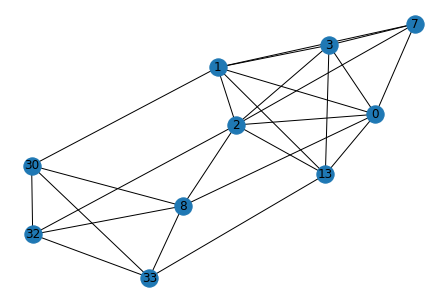

In [24]:
print(nx.core_number(g))
nx.draw(nx.k_core(g), with_labels = True)
show()

### Clustering

In [27]:
"""
The clustering coefficient of node i calculates the
probability for its neighbors to be each other’s neighbors as well. Note that this
metric assumes that the network is undirected. The following average clustering
coefficient is often used to measure the level of clustering in the entire network
"""
print(nx.clustering(g), '\n')
print(nx.average_clustering(g))

{0: 0.15, 1: 0.3333333333333333, 2: 0.24444444444444444, 3: 0.6666666666666666, 4: 0.6666666666666666, 5: 0.5, 6: 0.5, 7: 1.0, 8: 0.5, 9: 0, 10: 0.6666666666666666, 11: 0, 12: 1.0, 13: 0.6, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 0.3333333333333333, 20: 1.0, 21: 1.0, 22: 1.0, 23: 0.4, 24: 0.3333333333333333, 25: 0.3333333333333333, 26: 1.0, 27: 0.16666666666666666, 28: 0.3333333333333333, 29: 0.6666666666666666, 30: 0.5, 31: 0.2, 32: 0.19696969696969696, 33: 0.11029411764705882} 

0.5706384782076823


In [28]:
"""
This essentially captures the same aspect of the network as the average
clustering coefficient, i.e., how locally clustered the network is, 
but the transitivity can be calculated on directed networks too. 
It also treats each triangle more evenly, 
unlike the average clustering coefficient that tends to underestimate the
contribution of triplets that involve highly connected nodes.
"""
nx.transitivity(g)

0.2556818181818182

### Watts and Strogatz Small World
The clustering coefficient was first introduced by Watts and Strogatz, where they
showed that their small-world networks tend to have very high clustering compared to
their random counterparts. The following code replicates their computational experiment,
varying the rewiring probability p:

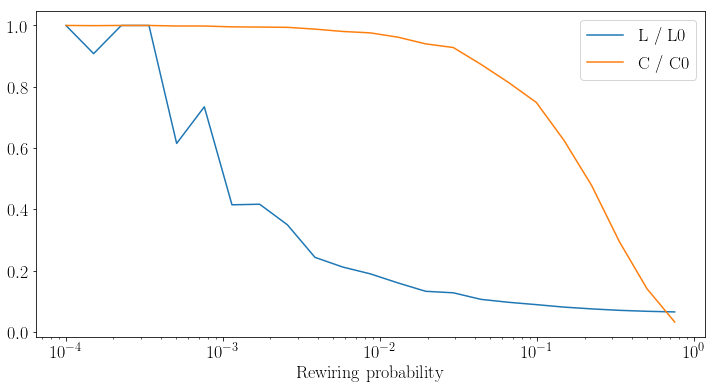

In [49]:
pdata = []
Ldata = []
Cdata = []

g0 = nx.watts_strogatz_graph(1000, 10, 0)
L0 = nx.average_shortest_path_length(g0)
C0 = nx.average_clustering(g0)

p = 0.0001
while p < 1.0:
    g = nx.watts_strogatz_graph(1000, 10, p)
    pdata.append(p)
    Ldata.append(nx.average_shortest_path_length(g) / L0)
    Cdata.append(nx.average_clustering(g) / C0)
    p *= 1.5

figure(figsize=(12, 6))
semilogx(pdata, Ldata, label = 'L / L0')
semilogx(pdata, Cdata, label = 'C / C0')
xlabel('Rewiring probability')
legend()
show()

The result is shown where the characteristic path length (L) and the average clustering coefficient (C) are plotted as their fractions to the baseline values (L0, C0) obtained from a purely regular network g0. As you can see in the figure, the network becomes very small (low L) yet remains highly clustered (high C) at the intermediate value of p around 10e-2.
This is the parameter regime where the Watts-Strogatz small-world networks arise

### Degree Distribution
A degree distribution of a network is a probability distribution i.e., the probability for a node to have degree k.

[0, 0, 0, 0, 0, 3, 33, 71, 151, 168, 187, 174, 96, 60, 26, 15, 11, 1, 4]


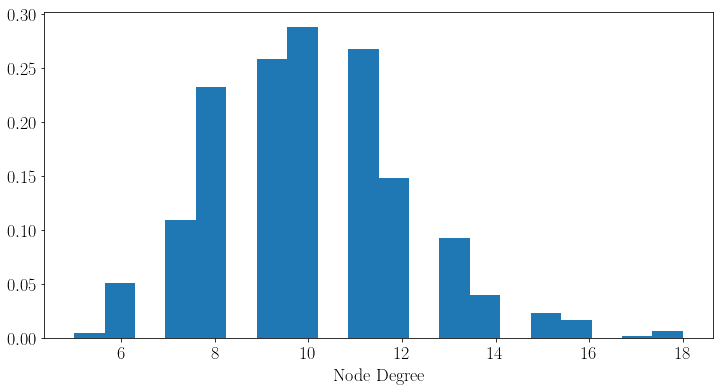

In [48]:
figure(figsize=(12, 6))
hist([degree for node, degree in g.degree], bins = 20, density=True)
xlabel('Node Degree')
print(nx.degree_histogram(g))
show()

# Pre-class work
**Percolation:** Following the mathematical analysis in the textbook, n is defined as the number of nodes in a network, and q is defined as the probability that a random node from the network is not part of the largest connected component (LCC) of the network. The derivation in the textbook shows that q is a solution to the equation:
$$q=e^{{\langle{k}\rangle}\left(q-1\right)}$$
where ${\langle{k}\rangle}$ is the average degree of the network.


**Question:** Given the information above, what is the theoretical estimate for the number of nodes in the LCC, expressed in terms of the known variables, n, q, and ${\langle{k}\rangle}$?

The expression for the q gives the probability for a random node to be part of the LCC, the compliment of q would be the probability that a randomly selected node is not part of the LCC. We can then write that the theoritical estimate for the number of nodes in the LCC is:
$$Number(LCC)=n\times\left(1-q\right)$$
$$Number(LCC)=n\times\left(1-e^{{\langle{k}\rangle}\left(q-1\right)}\right)$$


**Task:** Plot how the size of the LCC depends on the average degree ${\langle{k}\rangle}$ by using the theoretical result in (1). This equation does not have a nice analytical solution, so we use a numerical root finder in Scipy to determine the value of q that solves the equation for a given ${\langle{k}\rangle}$. A root finder computes a numerical solution to an equation of the form $f(x) = 0$, so we need to rewrite (1) as:
$$q-e^{{\langle{k}\rangle}\left(q-1\right)}=0$$

We give the expression on the left-hand side to the root finding function. Use the code below to compute q for different values of ${\langle{k}\rangle}$ in the range [1, 10]. Note that ${\langle{k}\rangle}$ will not necessarily be an integer since it is an average degree.

Use the value of q to determine the theoretical estimate for the size of the LCC in a network with average degree ${\langle{k}\rangle}$. Plot your results of how the size of the LCC depends on ${\langle{k}\rangle}$.

In [32]:
def calculate_q(k):
    '''
    Use a numerical root finder to determine q from the equation
    q = exp(k*(q-1)).
    '''
    from scipy.optimize import root
    return root(lambda q: q - np.exp(k * (q - 1)), 0).x[0]

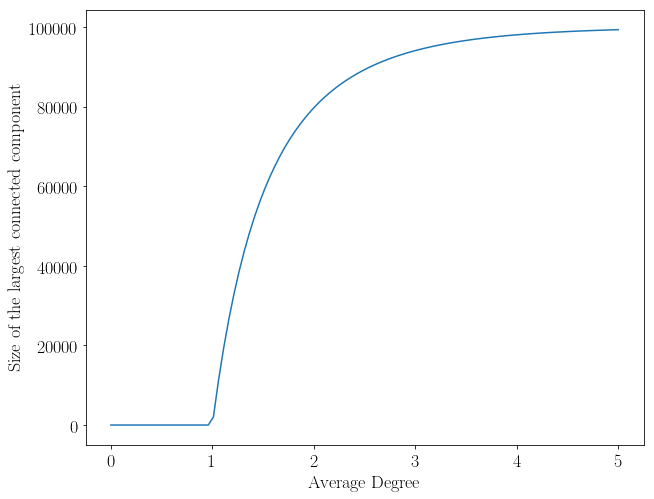

In [50]:
"""
The value of n has to be large since the expression for the probability q is simplified
using the limit: lim(n→∞) (1 + x/n)^n = e^x
"""
avg_degrees, LCC_size = np.linspace(0, 5, 100), []

for k in avg_degrees:
    q = calculate_q(k)
    LCC_size.append((10**5)*(1-q))

figure(figsize=(10, 8))
plot(avg_degrees, LCC_size)
xlabel('Average Degree')
ylabel('Size of the largest connected component')
show()

**interpretation:** As mentioned in the readings, if the average degree is greater than 1, then network percolation occurs. The plot shows that for an average that is slightly greater than 1, the estimate size of the largest connected component increases drastically. Afterwards, the estimation then approches the size of the network at average degree of 2 (80% of the network size), at that point, the increase of the estimated size of the LCC has a smaller slope that consequently tends to 0 as the average degree increases to 5 which corespond to a network where the LCC is the network itself.